<a href="https://colab.research.google.com/github/KshitijKhandelwal-Github/NY_Housing/blob/main/NY_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/NY-House-Dataset.csv")
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [2]:
data["BROKERTITLE"] = data["BROKERTITLE"].apply(lambda row: row.removeprefix("Brokered by "))
data["TYPE"] = data["TYPE"].apply(lambda row: row.removesuffix(" for sale"))
data=data.rename(columns={'TYPE':'type','BROKERTITLE':'broker', 'PRICE':'price',
                          'BEDS':'beds', 'BATH':'baths', 'PROPERTYSQFT':'sqft',
                          'ADDRESS':'address', 'STATE':'state',
                          'MAIN_ADDRESS':'full_address', 'LATITUDE':'lat',
                          'LONGITUDE':'lon', 'SUBLOCALITY':'sub_locality'})[[
                              'type','broker','price','beds','baths','sqft',
                              'address','state','full_address','lat','lon',
                              'sub_locality']]
data.head()

,type,broker,price,beds,baths,sqft,address,state,full_address,lat,lon,sub_locality
0,Condo,Douglas Elliman -111 Fifth Ave,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",40.761255,-73.974483,Manhattan
1,Condo,Serhant,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,40.766393,-73.980991,New York County
2,House,Sowae Corp,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",40.541805,-74.196109,Richmond County
3,Condo,COMPASS,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",40.761398,-73.974613,New York County
4,Townhouse,Sotheby's International Realty - East Side Man...,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",40.767224,-73.969856,New York County


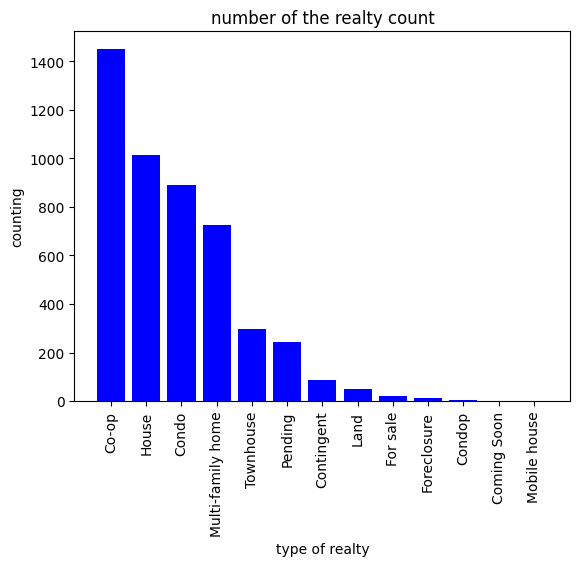

In [3]:
counter=data['type'].value_counts()
plt.bar(counter.index,counter,color='blue')
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('type of realty')
plt.ylabel('counting')
plt.title('number of the realty count')

# Show the plot
plt.show()

In [4]:
data[['price','beds','baths','sqft']].describe()

,price,beds,baths,sqft
count,4.801000e+03,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862
std,3.135525e+07,2.602315,1.946962,2377.140894
min,2.494000e+03,1.000000,0.000000,230.000000
25%,4.990000e+05,2.000000,1.000000,1200.000000
50%,8.250000e+05,3.000000,2.000000,2184.207862
75%,1.495000e+06,4.000000,3.000000,2184.207862
max,2.147484e+09,50.000000,50.000000,65535.000000


The above data shows the following result:

1.   The average price of a house in New York is 2 million. However, this may be due to a few outliers (i.e. a few extremely expensive houses). This claim is supported by the value of median ($825,000) which suggests that most houses are worth less than a million dollars.
2.   Every house has 3 beds and 2 baths on average.
3.   The average square footage of a house is 2,184 sqft.
4.   There is also an anomaly suggested by the max value of beds and baths, there is no way that a house in New York has 50 beds or 50 baths.



In [5]:
data.loc[data['baths']==50,:]
data.loc[data['beds']==50,:]

,type,broker,price,beds,baths,sqft,address,state,full_address,lat,lon,sub_locality
1143,Multi-family home,Blue Key Real Estate Brokerage,11000000,50,50.0,22035.0,8820 Avenue J,"Brooklyn, NY 11236","8820 Avenue JBrooklyn, NY 11236",40.637696,-73.904836,Kings County


After locating this property in the dataset and searching for it on the internet. It seems like the above property is an apartment building. This is what has resulted in it having so many beds and baths.

In [6]:
data['sub_locality'].unique()

array(['Manhattan', 'New York County', 'Richmond County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

Now, for easy analysis, I will change the sublocalities from actual sub-localities to the counties they belong to.

In [7]:
sublocalities_county = {
    "Manhattan": "New York County",
    "Richmond County": "Richmond County",
    "Kings County": "Kings County",
    "New York": "New York County",
    "New York County": "New York County",
    "East Bronx": "Bronx County",
    "Brooklyn": "Kings County",
    "The Bronx": "Bronx County",
    "Queens": "Queens County",
    "Staten Island": "Richmond County",
    "Queens County": "Queens County",
    "Bronx County": "Bronx County",
    "Coney Island": "Kings County",
    "Brooklyn Heights": "Kings County",
    "Jackson Heights": "Queens County",
    "Riverdale": "Bronx County",
    "Rego Park": "Queens County",
    "Fort Hamilton": "Kings County",
    "Flushing": "Queens County",
    "Dumbo": "Kings County",
    "Snyder Avenue": "Kings County"
}
data['sub_locality']=data['sub_locality'].apply(lambda row: sublocalities_county[row])
data['sub_locality']

0       New York County
1       New York County
2       Richmond County
3       New York County
4       New York County
             ...       
4796    New York County
4797      Queens County
4798    New York County
4799      Queens County
4800       Kings County
Name: sub_locality, Length: 4801, dtype: object

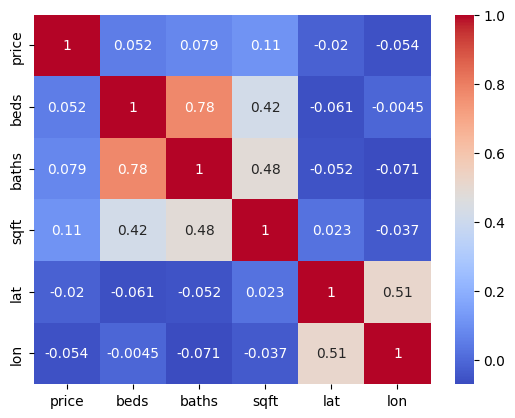

In [8]:
correlationn=pd.DataFrame()
for column in data.select_dtypes(include=[np.number]).columns:
    correlationn[column] = data[column]
relations=correlationn.corr()
sns.heatmap(relations, annot=True, cmap='coolwarm')
plt.show()

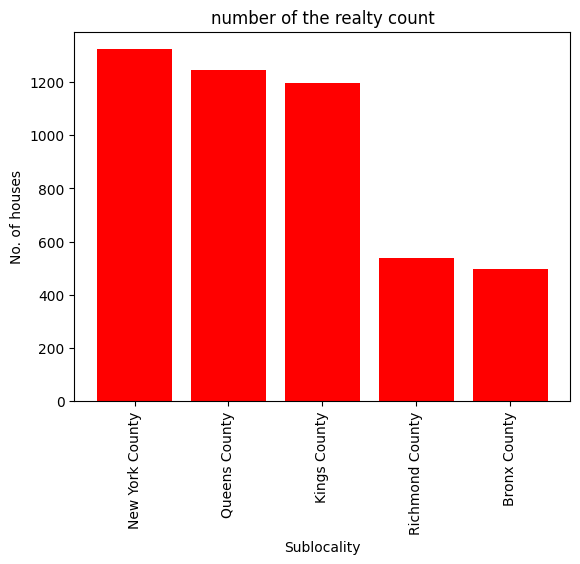

In [9]:
counter=data['sub_locality'].value_counts()
plt.bar(counter.index[:20],counter[:20],color='red')
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Sublocality')
plt.ylabel('No. of houses')
plt.title('number of the realty count')

# Show the plot
plt.show()


In [10]:
data.head()

,type,broker,price,beds,baths,sqft,address,state,full_address,lat,lon,sub_locality
0,Condo,Douglas Elliman -111 Fifth Ave,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",40.761255,-73.974483,New York County
1,Condo,Serhant,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,40.766393,-73.980991,New York County
2,House,Sowae Corp,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",40.541805,-74.196109,Richmond County
3,Condo,COMPASS,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",40.761398,-73.974613,New York County
4,Townhouse,Sotheby's International Realty - East Side Man...,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",40.767224,-73.969856,New York County


In [11]:
data["price_in_k"] = np.round(data["price"]/1000, 2)
data[["sub_locality", "price_in_k"]].groupby("sub_locality").agg(["min", "max", "std", "mean", "median"])

price_in_k                                               
                       min         max           std         mean  median
sub_locality                                                             
Bronx County         49.50    14000.00   1011.000476   760.072883   594.0
Kings County          5.80    31500.00   1914.630911  1432.140659   949.0
New York County       2.49   195000.00   8715.525065  4206.401686  1460.0
Queens County       100.00    15000.00    803.795448   824.293727   669.0
Richmond County      90.00  2147483.65  92465.532915  4882.475788   728.9

In [12]:
data.loc[data["sub_locality"] == "Richmond County",:].sort_values(by="price", ascending=False).head(10)

,type,broker,price,beds,baths,sqft,address,state,full_address,lat,lon,sub_locality,price_in_k
304,House,ANNE LOPA REAL ESTATE,2147483647,7,6.000000,10000.000000,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",40.518484,-74.224418,Richmond County,2147483.65
7,House,Connie Profaci Realty,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",40.595002,-74.106424,Richmond County,16800.00
2653,Multi-family home,NEUHAUS REALTY INC.,10700000,42,43.000000,27152.000000,646-662 Port Richmond Ave,"Staten Island, NY 10302","646-662 Port Richmond AveStaten Island, NY 10302",40.627671,-74.142352,Richmond County,10700.00
3529,House,Corcoran Brooklyn Heights,6700000,3,2.373861,2184.207862,450 Front St,"Staten Island, NY 10304","450 Front StStaten Island, NY 10304",40.626225,-74.074564,Richmond County,6700.00
3524,House,Corcoran Brooklyn Heights,6700000,3,2.373861,2184.207862,450 Front St,"Staten Island, NY 10304","450 Front StStaten Island, NY 10304",40.626225,-74.074564,Richmond County,6700.00
1295,Multi-family home,Joanne Costa Realty,3995000,3,2.373861,12200.000000,639 Tompkins Ave,"Staten Island, NY 10305","639 Tompkins AveStaten Island, NY 10305",40.610728,-74.070161,Richmond County,3995.00
392,Land,Prereal Prendamano Real Estate,3950000,3,2.373861,2184.207862,750 Barclay Ave,"Staten Island, NY 10312","750 Barclay AveStaten Island, NY 10312",40.525422,-74.166603,Richmond County,3950.00
4353,Multi-family home,American Dream Kalaba Realty LLC,3200000,3,2.373861,17000.000000,151 Daniel Low Ter,"Staten Island, NY 10301","151 Daniel Low TerStaten Island, NY 10301",40.640823,-74.080024,Richmond County,3200.00
1411,House,NoBroker,2900000,5,2.373861,6707.000000,29 Annfield Ct,"Staten Island, NY 10304","29 Annfield CtStaten Island, NY 10304",40.600034,-74.106424,Richmond County,2900.00
1107,House,Staten Island Premiere Properties,2898555,5,5.000000,7200.000000,545 Arbutus Ave,"Staten Island, NY 10312","545 Arbutus AveStaten Island, NY 10312",40.520302,-74.178057,Richmond County,2898.56


Looking at this data we find that the highest price of a house in Richmond County is around 2 billion dollars which seems ridiculous. So, I searched it up and found that the price updated in the dataset is wrong and the actual price is 2595000 dollars. So, I have corrected it below.

In [13]:
data.price[304] = 2595000

data["price_in_k"] = np.round(data["price"]/1000, 2)
data[["sub_locality", "price_in_k"]].groupby("sub_locality").agg(["min", "max", "std", "mean", "median"])

<ipython-input-13-d23d83778e9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price[304] = 2595000


price_in_k                                            
                       min       max          std         mean  median
sub_locality                                                          
Bronx County         49.50   14000.0  1011.000476   760.072883   594.0
Kings County          5.80   31500.0  1914.630911  1432.140659   949.0
New York County       2.49  195000.0  8715.525065  4206.401686  1460.0
Queens County       100.00   15000.0   803.795448   824.293727   669.0
Richmond County      90.00   16800.0  1022.727496   903.090538   728.9

In [14]:
px.histogram(np.log(data.price))

In [15]:
import plotly.express as px

# Create a heatmap using the latitude and longitude of each property and the price
fig = px.density_mapbox(data, lat='lat', lon='lon', z='price', radius=7,
                        center=dict(lat=data.lat.mean(), lon=data.lon.mean()), zoom=11.5,
                        mapbox_style="open-street-map", height=900, opacity=0.8)
fig.update_layout(mapbox_style="carto-positron")
fig.show()


In [16]:
import folium
from folium import plugins

map = folium.Map(location=[data.lat.mean(), data.lon.mean()], zoom_start=11.4)

MAX = np.log(data.price.max())
hm = plugins.HeatMap([[row["lat"], row["lon"], np.log(row["price_in_k"])/MAX] for index, row in data.iterrows()],
                     gradient={0.85: 'blue', 0.95: 'lime', 1: 'red'})
hm.add_to(map)


map